In [95]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
tmp_data_path = '../MA_data/data/tmp'


s_year = 1997
e_year = 2019

In [93]:
fv_ma = pd.read_pickle(f'{tmp_data_path}/merged_fv_ma_{s_year}_{e_year}.pickle')

In [94]:
fv_ma.columns

Index(['index', 'ACU', 'ASIC2', 'ABL', 'ANL', 'APUBC', 'AUP', 'AUPSIC',
       'AUPBL', 'AUPNAMES', 'AUPPUB', 'BLOCK', 'CREEP', 'DA', 'DE', 'STATC',
       'SYNOP', 'VAL', 'PCTACQ', 'PSOUGHTOWN', 'PSOUGHT', 'PHDA', 'PCTOWN',
       'PSOUGHTT', 'PRIVATIZATION', 'DEAL_NO', 'TCU', 'TSIC2', 'TBL', 'TNL',
       'TPUBC', 'TUP', 'TUPSIC', 'TUPBL', 'TUPNAMES', 'TUPPUB', 'SIC_A',
       'SIC_T', 'YEAR', 'AGVKEY', 'TGVKEY', 'AT_A', 'SALE_A', 'M2B_A', 'LEV_A',
       'ROA_A', 'PPE_A', 'CASH2ASSET_A', 'CASH2SALE_A', 'SALE2ASSET_A', 'CR_A',
       'D_SALE_A', 'D_AT_A', 'N_NA_A', 'AT_T', 'SALE_T', 'M2B_T', 'LEV_T',
       'ROA_T', 'PPE_T', 'CASH2ASSET_T', 'CASH2SALE_T', 'SALE2ASSET_T', 'CR_T',
       'D_SALE_T', 'D_AT_T', 'N_NA_T'],
      dtype='object')

# Acquiror

if we model each acquirer as a sequence in TPP. The model requires significant number of acquisition happened for each acquirer.

In [69]:
a_series = fv_ma.AGVKEY.value_counts()

In [70]:
# print quantile
print(np.quantile(np.array(a_series), 0.25)) # "num of events" thes of 25 quantile
print(np.quantile(np.array(a_series), 0.5))
print(np.quantile(np.array(a_series), 0.75))
print(np.quantile(np.array(a_series), 0.95))
print(np.quantile(np.array(a_series), 0.99)) # only top 1% acuqior has >40 acquisition

1.0
2.0
4.0
12.0
29.0


In [71]:
a_series[0] # top one has 11907 acquisition????

119

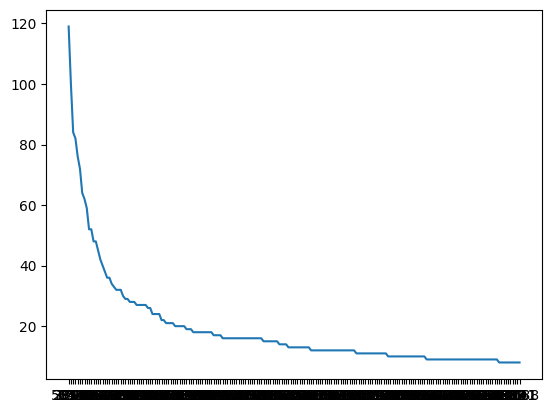

In [76]:
plt.plot(a_series[:200])
plt.show()

explore the top 1 acquirer: GVKEY = 17010; cusip = 531229607




In [84]:
fv_ma[fv_ma['AGVKEY'] == '5047'][:2]

,index,ACU,ASIC2,ABL,ANL,APUBC,AUP,AUPSIC,AUPBL,AUPNAMES,...,LEV_T,ROA_T,PPE_T,CASH2ASSET_T,CASH2SALE_T,SALE2ASSET_T,CR_T,D_SALE_T,D_AT_T,N_NA_T
76,6002.0,36965V,6141/6153/6159,Provide financing services,General Electric Capital Services,Sub.,369604,3612\n3511\n3651\n3663\n3641\n3632\n3724\n2821...,"General Electric Co, located\nin Boston, Massa...",General Electric Co,...,0.142791,0.015988,0.004778,0.0,0.000026,0.155045,3.665873,1.622015,10.117869,4
77,6002.0,36965V,6141/6153/6159,Provide financing services,General Electric Capital Services,Sub.,369604,3612\n3511\n3651\n3663\n3641\n3632\n3724\n2821...,"General Electric Co, located\nin Boston, Massa...",General Electric Co,...,0.142791,0.015988,0.004778,0.0,0.000026,0.155045,3.665873,1.622015,10.117869,4


In [86]:
fv_ma[fv_ma['AGVKEY'] == '5047'][:2]['PSOUGHT']

76    100.0
77    100.0
Name: PSOUGHT, dtype: float64

In [89]:
fv_ma[fv_ma['AGVKEY'] == '5047'].to_csv('check_top1.csv')

In [87]:
fv_ma[fv_ma['AGVKEY'] == '5047'][:2]['PCTOWN']

76    100.0
77    100.0
Name: PCTOWN, dtype: float64

# Target

In [96]:
t_series = fv_ma.TGVKEY.value_counts()

In [98]:
# print quantile
print(np.quantile(np.array(t_series), 0.25)) # "num of events" thes of 25 quantile
print(np.quantile(np.array(t_series), 0.5))
print(np.quantile(np.array(t_series), 0.75))
print(np.quantile(np.array(t_series), 0.95))
print(np.quantile(np.array(t_series), 0.99)) # only top 1% acuqior has >40 acquisition

1.0
1.0
4.0
13.0
30.0


In [99]:
t_series[0] # top one has 11907 acquisition????

96

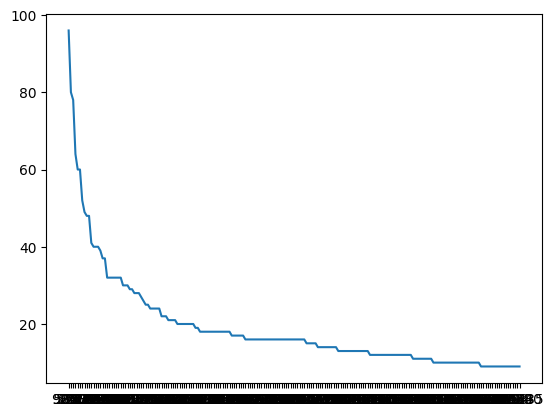

In [100]:
plt.plot(t_series[:200])
plt.show()

# Q1 is the top acquirer also top target?

In [108]:
a_df = pd.DataFrame({'acquirer_count':a_series})

In [109]:
a_df['acquirer_rank'] = a_df['acquirer_count'].rank(ascending=False)

In [110]:
t_df = pd.DataFrame({'target_count':t_series})

In [111]:
t_df['target_rank'] = t_df['target_count'].rank(ascending=False)

In [112]:
a_t_rank = a_df.merge(t_df, left_index = True, right_index = True)

In [114]:
a_t_rank[['acquirer_rank', 'target_rank']].corr()

,acquirer_rank,target_rank
acquirer_rank,1.000000,0.409641
target_rank,0.409641,1.000000


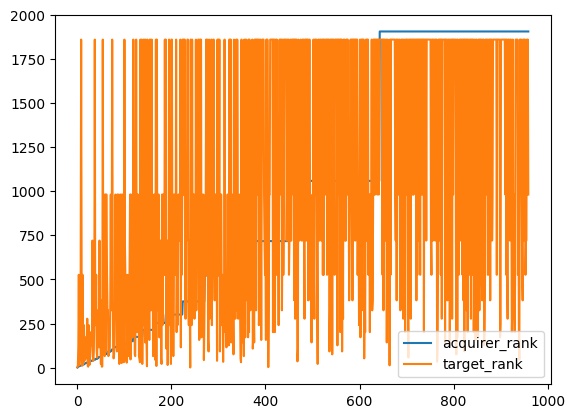

In [119]:
plt.plot(np.arange(0, a_t_rank.shape[0],1), a_t_rank['acquirer_rank'], label = 'acquirer_rank')
plt.plot(np.arange(0, a_t_rank.shape[0],1), a_t_rank['target_rank'], label = 'target_rank')
plt.legend()
plt.show()

anwser: they do not have strong correlation.